Both Ridge Regression and Lasso Regression are regularization techniques,they mainly differ in how they assign penalty to the coefficients

Ridge Regression performs L2 regularization where it adds penalty equivalent to the square of the magnitude of coefficients

Minimization Objective = LS obj + α *(Sum of squares of coefficients)

Lasso Regression performs L1 regularization i.e., adds penalty equivalent to absolute value of the magnitude of the coefficients

Minimization Objective = LS obj + α * (Sum of absolute value of the coefficients) here LS obj refers to lease squares objective i.e.,Linear Regression objectives without regulairization

#LASSO - Lease Absolute Shrinkage and Selection Operator Regression It automatically performs feature selection and outputs a
#sparse model.It is majorly used to prevent overfitting
'''Cost Function J(theta) = MSEt(theta) + α∑(i =1 to n)|θ|'''

Lasso Regression performs feature selection and outputs a sparse model

In [3]:
import pandas as pd,numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [4]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print(cancer.data.shape)

(569, 30)


In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
cancer_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
#Preprocessing [To check null values]
cancer_df.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
#To check the sum of null values in eachand every column
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [16]:
X = cancer.data
Y = cancer.target

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,
                                      test_size=0.3,random_state=31)

In [19]:
lasso = Lasso()
lasso.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
train_score = lasso.score(X_train,Y_train)
test_score = lasso.score(X_test,Y_test)
print("Lasso Regression training score:",train_score)
print("Lasso Regression test score",test_score)

Lasso Regression training score: 0.5600974529893081
Lasso Regression test score 0.5832244618818156


In [21]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -9.10366021e-05,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.28811188e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -3.29832072e-03, -3.76623718e-04,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00])

In [22]:
np.sum(lasso.coef_==0)

26

In [23]:
coeff_used = np.sum(lasso.coef_!=0)
coeff_used

4

In [25]:
used_feats = cancer_df.columns[(lasso.coef_ != 0)]
used_feats

Index(['mean area', 'area error', 'worst perimeter', 'worst area'], dtype='object')

In [24]:
used_feats = cancer_df.columns[(lasso.coef_ != 0).ravel().tolist()]
used_feats

Index(['mean area', 'area error', 'worst perimeter', 'worst area'], dtype='object')

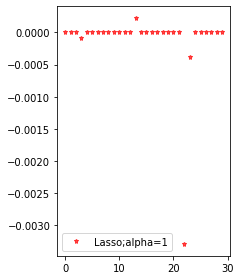

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Coefficient Index",fontsize = 16)
plt.ylabel("Coefficient Magnitude",fontsize = 16)
plt.subplot(122)
plt.plot(lasso.coef_,alpha = 0.7,linestyle='none',marker='*',
         markersize=5,color='red',label='Lasso;alpha=1')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

With this, out of 30 features in cancer data-set, only 4 features are used (non zero value of the coefficient)
Both training and test score (with only 4 features) are low; we conclude that the model is under-fitting the cancer data-set so to reduce this we increase the number of iterations by reducing the alpha so lets try with alpha = 0.01

In [31]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,Y_train)
train_score = lasso.score(X_train,Y_train)
test_score = lasso.score(X_test,Y_test)
print("Lasso Regression training score:",train_score)
print("Lasso Regression test score",test_score)

Lasso Regression training score: 0.7037865778498826
Lasso Regression test score 0.6641831577726228


In [33]:
coeff_used = np.sum(lasso.coef_!=0)
coeff_used

10

In [34]:
used_feats = cancer_df.columns[(lasso.coef_ != 0)]
used_feats

Index(['mean texture', 'mean perimeter', 'mean area', 'perimeter error',
       'area error', 'worst radius', 'worst texture', 'worst perimeter',
       'worst area', 'worst concavity'],
      dtype='object')

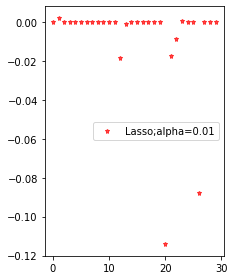

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Coefficient Index",fontsize = 16)
plt.ylabel("Coefficient Magnitude",fontsize = 16)
plt.subplot(122)
plt.plot(lasso.coef_,alpha = 0.7,linestyle='none',marker='*',
         markersize=5,color='red',label='Lasso;alpha=0.01')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr_train_score=lr.score(X_train,Y_train)
lr_test_score=lr.score(X_test,Y_test)
print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)

LR training score: 0.7842206194055068
LR test score:  0.7329325010888672


In [40]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,Y_train)
train_score = lasso.score(X_train,Y_train)
test_score = lasso.score(X_test,Y_test)
print("Lasso Regression training score:",train_score)
print("Lasso Regression test score",test_score)

Lasso Regression training score: 0.7754872047516964
Lasso Regression test score 0.7313823250204421


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.88995728436538, tolerance: 0.009346733668341708
  positive)


Further reduce α =0.0001, non-zero features = 22. Training and test scores are similar to basic linear regression case.

In [41]:
coeff_used = np.sum(lasso.coef_!=0)
coeff_used

22